<a href="https://colab.research.google.com/github/Nirav-Madhani/NaturalPartitioning/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Natural Partitioning using 3-4-5 Rule

In [ ]:
import numpy as np
import pandas as pd
from math import log10 , log , floor

##Applying on Give Data
(1st variant, directly printing the tree)

Divide Function finds number of unique values at most significant digit, and accordingly applies 3-4-5 rule

In [ ]:
def divide(dataOrignal,depth):
  if depth != 0:
    data = dataOrignal
    msd = 10**floor(log10(max(dataOrignal)))
    data = np.array([i//msd for i in data])
    n = len(np.unique(data))
    print('\t'*(2-depth),n,"Distinct MSD")
    if n in [3,6,9]:
      print('\t'*(2-depth),"3 Partition")
      partition(dataOrignal,depth,3)
    elif n in [2,4,8]:
      print('\t'*(2-depth),"4 Partition")
      partition(dataOrignal,depth,4)
    elif n in [1,5,10]:
      print('\t'*(2-depth),"5 Partition")
      partition(dataOrignal,depth,5)


Partition accepts depth and n, where n is number of groups to partition data into.

Then, partition recursively calls divide on each group of data with depth = depth-1

When depth is 0, the process stops.

In [ ]:
def partition(arr,depth,n):
  if depth!=0:
    m = min(arr)
    w = (max(arr)-m)/n
    d = {}
    for i in range(n):
      d[i] = []
    for num in arr:
      for i in range(n):
        if num < m + w*(i+1):
          if not i in d.keys():
            d[i] = []
          d[i].append(num)  
          break  
    for i,v in d.items():
      print('\t'*(2-depth),m+i*w,'to',m+(i+1)*w)
      print('\t'*(2-depth),v)
      if len(v)==0:continue
      #print('i=',depth)
      divide(v,depth-1)

**Printing Output**

In [ ]:
dataOrignal = np.array([32, 38, 48, 91, 46, 37, 22, 69, 78, 82, 33, 49, 55, 66, 84, 86, 67, 80, 79, 44])
divide(dataOrignal,2)

 8 Distinct MSD
 4 Partition
 22.0 to 39.25
 [32, 38, 37, 22, 33]
	 2 Distinct MSD
	 4 Partition
	 22.0 to 26.0
	 [22]
	 26.0 to 30.0
	 []
	 30.0 to 34.0
	 [32, 33]
	 34.0 to 38.0
	 [37]
 39.25 to 56.5
 [48, 46, 49, 55, 44]
	 2 Distinct MSD
	 4 Partition
	 44.0 to 46.75
	 [46, 44]
	 46.75 to 49.5
	 [48, 49]
	 49.5 to 52.25
	 []
	 52.25 to 55.0
	 []
 56.5 to 73.75
 [69, 66, 67]
	 1 Distinct MSD
	 5 Partition
	 66.0 to 66.6
	 [66]
	 66.6 to 67.2
	 [67]
	 67.2 to 67.8
	 []
	 67.8 to 68.4
	 []
	 68.4 to 69.0
	 []
 73.75 to 91.0
 [78, 82, 84, 86, 80, 79]
	 2 Distinct MSD
	 4 Partition
	 78.0 to 80.0
	 [78, 79]
	 80.0 to 82.0
	 [80]
	 82.0 to 84.0
	 [82]
	 84.0 to 86.0
	 [84]


#Real-World Example

####Second Variant : Storing The Tree In Dictionary


In [ ]:
star = pd.read_csv('star.csv')

In [ ]:
temperatures = star[star.columns[0]]
temperatures

0       3068
1       3042
2       2600
3       2800
4       1939
       ...  
235    38940
236    30839
237     8829
238     9235
239    37882
Name: Temperature (K), Length: 240, dtype: int64

In [ ]:
divide(temperatures,2)

 5 Distinct MSD
 5 Partition
 1939.0 to 9551.2
 [3068, 3042, 2600, 2800, 1939, 2840, 2637, 2600, 2650, 2700, 3600, 3129, 3134, 3628, 2650, 3340, 2799, 3692, 3192, 3441, 7740, 7220, 8500, 8570, 7700, 7230, 5800, 8052, 6757, 6380, 5936, 5587, 3826, 3365, 3270, 3200, 3008, 3600, 3575, 3574, 3625, 3490, 3750, 3834, 3749, 3650, 3450, 3660, 3450, 3752, 3535, 3341, 3432, 2983, 2835, 2935, 3295, 2945, 2817, 2774, 2871, 3345, 3607, 3304, 3150, 3550, 3180, 2890, 3342, 2621, 3158, 7100, 8930, 5300, 4526, 4077, 4980, 9030, 5112, 7720, 3459, 3605, 3615, 3399, 3610, 3553, 4015, 3625, 6850, 3780, 3323, 3531, 3218, 3146, 3511, 3225, 2935, 2861, 2856, 2731, 3095, 3607, 3100, 2989, 3542, 3243, 3091, 3598, 3324, 3541, 8924, 7723, 8945, 5752, 8927, 7282, 9373, 3570, 3500, 4287, 3600, 3614, 2831, 2914, 3419, 3218, 3453, 2889, 2968, 3484, 2778, 3523, 3462, 3257, 2994, 3212, 3523, 3598, 3142, 3496, 3324, 3463, 9320, 8250, 9383, 8829, 9235]
	 9 Distinct MSD
	 3 Partition
	 1939.0 to 4420.333333333334
	 [3068,

In [ ]:
def partition1(arr,depth,n):
  if depth!=0:
    m = min(arr)
    w = (max(arr)-m)/n
    d,dd = {},{}
    for i in range(n):
      d[i] = []
      dd[i]= []
    for num in arr:
      for i in range(n):
        if num < m + w*(i+1):
          if not i in d.keys():
            d[i] = []
          d[i].append(num)  
          break  
    for i,v in d.items():
      #print('\t'*(2-depth),m+i*w,'to',m+(i+1)*w)
      #print('\t'*(2-depth),v)
      if len(v)==0:continue
      #print('i=',depth)
      dd[i]=(m+i*w,m+(i+1)*w,divide1(v,depth-1))
    return dd
  return arr
def divide1(dataOrignal,depth):
  if depth != 0:
    data = dataOrignal
    msd = 10**floor(log10(max(dataOrignal)))
    data = np.array([i//msd for i in data])
    n = len(np.unique(data))
    #print('\t'*(2-depth),n,"Distinct MSD")
    if n in [3,6,9]:
      #print('\t'*(2-depth),"3 Partition")
      return partition1(dataOrignal,depth,3)
    elif n in [2,4,8]:
      #print('\t'*(2-depth),"4 Partition")
      return partition1(dataOrignal,depth,4)
    elif n in [1,5,10]:
      #print('\t'*(2-depth),"5 Partition")
      return partition1(dataOrignal,depth,5)
  return dataOrignal


In [ ]:
treeDict = divide1(temperatures,2)

In [ ]:
def printTreeDict(td,d):
  if d==2 : return
  for k,v in td.items():
    if len(v)==3:
      a,b,c = v
      print('\t'*d,a,'-',b)
      printTreeDict(c,d+1)
printTreeDict(treeDict,0)

 1939.0 - 9551.2
	 1939.0 - 4420.333333333334
	 4420.333333333334 - 6901.666666666667
	 6901.666666666667 - 9383.0
 9551.2 - 17163.4
	 9675.0 - 11541.25
	 11541.25 - 13407.5
	 13407.5 - 15273.75
	 15273.75 - 17140.0
 17163.4 - 24775.6
	 17200.0 - 19057.5
	 19057.5 - 20915.0
	 20915.0 - 22772.5
	 22772.5 - 24630.0
 24775.6 - 32387.8
	 25000.0 - 26459.75
	 26459.75 - 27919.5
	 27919.5 - 29379.25
	 29379.25 - 30839.0
 32387.8 - 40000.0
	 32460.0 - 33768.0
	 33768.0 - 35076.0
	 35076.0 - 36384.0
	 37692.0 - 39000.0


In [ ]:
print(treeDict)

{0: (1939.0, 9551.2, {0: (1939.0, 4420.333333333334, {0: (1939.0, 2526.0, [1939]), 1: (2526.0, 3113.0, [3068, 3042, 2600, 2800, 2840, 2637, 2600, 2650, 2700, 2650, 2799, 3008, 2983, 2835, 2935, 2945, 2817, 2774, 2871, 2890, 2621, 2935, 2861, 2856, 2731, 3095, 3100, 2989, 3091, 2831, 2914, 2889, 2968, 2778, 2994]), 2: (3113.0, 3700.0, [3600, 3129, 3134, 3628, 3340, 3692, 3192, 3441, 3365, 3270, 3200, 3600, 3575, 3574, 3625, 3490, 3650, 3450, 3660, 3450, 3535, 3341, 3432, 3295, 3345, 3607, 3304, 3150, 3550, 3180, 3342, 3158, 3459, 3605, 3615, 3399, 3610, 3553, 3625, 3323, 3531, 3218, 3146, 3511, 3225, 3607, 3542, 3243, 3598, 3324, 3541, 3570, 3500, 3600, 3614, 3419, 3218, 3453, 3484, 3523, 3462, 3257, 3212, 3523, 3598, 3142, 3496, 3324, 3463]), 3: (3700.0, 4287.0, [3826, 3750, 3834, 3749, 3752, 4077, 4015, 3780])}), 1: (4420.333333333334, 6901.666666666667, {0: (4526.0, 5300.666666666667, [5300, 4526, 4980, 5112]), 1: (5300.666666666667, 6075.333333333333, [5800, 5936, 5587, 5752]), 2: (

In [ ]:
def convert(d):  
  if not isinstance(d,dict):
    return str([])
  ans = {}
  for k,v in d.items():
    if isinstance(v,list):
      return str([])
    else:
      (a,b,c) = v
      if isinstance(c,list):
        
        if len(c) in range (0,10):
          ans[str(a)+" - "+str(b)] = str(c)   
        else:
            aa = c[:3]          
            aa.append(" ... ")
            aa.extend(c[-3:])
            ans[str(a)+" - "+str(b)] = str(aa)   
      else :
        ans[str(a)+" - "+str(b)]=convert(c)
  return ans
b={str(min(temperatures))+"-"+str(max(temperatures)):convert(treeDict)}
print(b)

{'1939-40000': {'1939.0 - 9551.2': {'1939.0 - 4420.333333333334': "[3068, 3042, 2600, ' ... ', 3496, 3324, 3463]", '4420.333333333334 - 6901.666666666667': "[5800, 6757, 6380, ' ... ', 5112, 6850, 5752]", '6901.666666666667 - 9383.0': "[7740, 7220, 8500, ' ... ', 8250, 8829, 9235]"}, '9551.2 - 17163.4': {'9675.0 - 11541.25': "[9700, 10574, 9675, ' ... ', 10012, 9892, 10930]", '11541.25 - 13407.5': "[12990, 11790, 12010, ' ... ', 13340, 13089, 12749]", '13407.5 - 15273.75': '[14100, 13720, 14245, 13420, 14520, 14732, 14060, 14982]', '15273.75 - 17140.0': '[16500, 15276, 17120, 16390, 16790, 15680, 16787]'}, '17163.4 - 24775.6': {'17200.0 - 19057.5': '[17200, 18290, 17383, 18000, 18340, 17920, 18734]', '19057.5 - 20915.0': '[19860, 20120, 19923, 19920, 19360, 19400]', '20915.0 - 22772.5': '[21020, 22350, 22012, 21738, 21904]', '22772.5 - 24630.0': '[23000, 24345, 24490, 24020, 23092, 23678, 23440, 23095, 24145]'}, '24775.6 - 32387.8': {'25000.0 - 26459.75': '[25000, 25070, 26140, 25390, 

Ploting Tree From My Dictionary
https://stackoverflow.com/a/13690321/12907462

In [ ]:
##https://stackoverflow.com/a/13690321/12907462
import pydot
def draw(parent_name, child_name):
    edge = pydot.Edge(parent_name, child_name)
    graph.add_edge(edge)

def visit(node, parent=None):
    for k,v in node.items():
        if isinstance(v, dict):
            # We start with the root node whose parent is None
            # we don't want to graph the None node
            if parent:
                draw(parent, k)
            visit(v, k)
        else:
            draw(parent, k)
            # drawing the label using a distinct name
            draw(k, v)
#############

graph = pydot.Dot(graph_type='graph')
visit(b)
graph.write_png('tree.png')


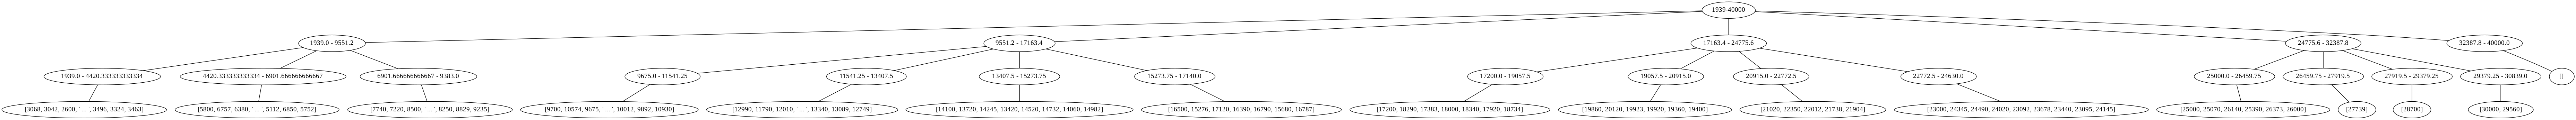

In [ ]:
import cv2 
from google.colab.patches import cv2_imshow
image = cv2.imread('tree.png') 
cv2_imshow( image) 